# Final Project

Welcome to the final practical project for our course on [Data Science Bootcamp](https://open.hpi.de/courses/datascience2023). Throughout this project, you will go through the entire data science process, starting from data loading and cleaning, all the way to running a model and making predictions. This hands-on project will provide you with valuable experience and allow you to apply the concepts and techniques you've learned in the course. Get ready to dive into real-world data analysis and build your skills as a data scientist!


## Important Remarks:

 - The ultimate goal of this project is to conduct comprehensive data analysis and build 2 models using the provided datasets.
 - Code is not the only thing graded here. Well-written and understandable documentation of your code is to be expected
 - Clear reasoning behind your choices in every step of the notebook is important. Be it the choice of a data cleaning technique or selecting certain features in your analysis or the choice of your 2 models

# Importing packages


In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn import linear_model
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import LabelEncoder
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report, confusion_matrix
from sklearn.tree import DecisionTreeRegressor
from sklearn import metrics

# Load the dataset into data


In [2]:
#Loading the dataset into a dataframe called data
data = pd.read_csv('titanic.csv')

# Dataset overview and statistical summary


In [3]:
#Previewing the first 5 rows of the data
data.head(5)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [4]:
#Learning about the columns and other relevant info about the table
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  1000 non-null   int64  
 1   Survived     1000 non-null   int64  
 2   Pclass       1000 non-null   int64  
 3   Name         1000 non-null   object 
 4   Sex          1000 non-null   object 
 5   Age          823 non-null    float64
 6   SibSp        1000 non-null   int64  
 7   Parch        1000 non-null   int64  
 8   Ticket       1000 non-null   object 
 9   Fare         1000 non-null   float64
 10  Cabin        299 non-null    object 
 11  Embarked     998 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 93.9+ KB


In [5]:
#Statistical summary of the data
data.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,1000.000000,1000.000000,1000.000000,823.000000,1000.000000,1000.000000,1000.000000
mean,500.500000,0.404000,2.274000,30.177606,0.716000,0.571000,56.732249
std,288.819436,0.490943,0.840018,15.138305,1.312656,1.046926,98.014902
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,250.750000,0.000000,1.000000,21.000000,0.000000,0.000000,8.050000
50%,500.500000,0.000000,3.000000,29.000000,0.000000,0.000000,17.600000
75%,750.250000,1.000000,3.000000,39.500000,1.000000,1.000000,52.000000
max,1000.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


# Data cleaning

In [6]:
#Check for any null values
data.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          701
Embarked         2
dtype: int64

Let's fill in the missing data for the three columns with missing data (i.e., Age, Cabin and Embarked)

### Data Cleaning - Age

Because there is a wide range of ages, let's use the median to fill in missing values. The median refers to the middle number in the dataset. 

In [7]:
#I want to find the median age for each Pclass by male and female. 
#This is what I will use to fill in missing data in the Age column.
data.groupby(['Pclass', 'Sex']).median('Age')

PassengerId  Survived   Age  SibSp  Parch     Fare
Pclass Sex                                                       
1      female        539.0       1.0  35.0    1.0    0.0  86.5000
       male          537.0       0.0  40.5    0.0    0.0  52.0000
2      female        518.0       1.0  28.0    0.0    0.0  26.0000
       male          549.0       0.0  30.0    0.0    0.0  14.2500
3      female        428.0       1.0  22.0    0.0    0.0  14.4583
       male          489.0       0.0  26.0    0.0    0.0   7.9250

In [8]:
#Filling in the missing age data based on median grouped by the Pclass and Sex 
data['Age'] = data['Age'].fillna(data.groupby(['Pclass', 'Sex'])['Age'].transform('median'))

### Data Cleaning - Cabin

Because we can't guess the exact cabin number the passenger was in for those that have missing data, let's fix the cabin data to just specify the cabin section they were in without the number (e.g., B, C).

In [9]:
#Extracting just the cabin letter
data['Cabin'] = data['Cabin'].str.extract(r'([A-Za-z])\d*')

Because the cabin is categorical data, let's use the mode to fill in missing data. The mode refers to the value that appears most often.

In [10]:
#Filling in the missing Cabin data based on the mode
data['Cabin'] = data['Cabin'].fillna(value=data['Cabin'].mode()[0])

### Data Cleaning - Embarked

Embarked refers to the location where the passenger left. Because there are only 2 missing values from the data and because this is categorical data, let's use the mode to fill in missing data. The mode refers to the value that appears most often.

In [11]:
#Filling in the missing Embarked data based on the mode
data['Embarked'] = data['Embarked'].fillna(value=data['Embarked'].mode()[0])

# EDA

### General EDA
Let's check the data again to see what has changed after adding the data for null values. 

In [12]:
#Check for any null values again to make sure everything has been filled in
data.isnull().sum()

PassengerId    0
Survived       0
Pclass         0
Name           0
Sex            0
Age            0
SibSp          0
Parch          0
Ticket         0
Fare           0
Cabin          0
Embarked       0
dtype: int64

In [13]:
#Statistical summary of the new data
data.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000
mean,500.500000,0.404000,2.274000,29.695670,0.716000,0.571000,56.732249
std,288.819436,0.490943,0.840018,13.973015,1.312656,1.046926,98.014902
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,250.750000,0.000000,1.000000,22.000000,0.000000,0.000000,8.050000
50%,500.500000,0.000000,3.000000,27.000000,0.000000,0.000000,17.600000
75%,750.250000,1.000000,3.000000,38.000000,1.000000,1.000000,52.000000
max,1000.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


Let's understand the relationship between some of the different variables.

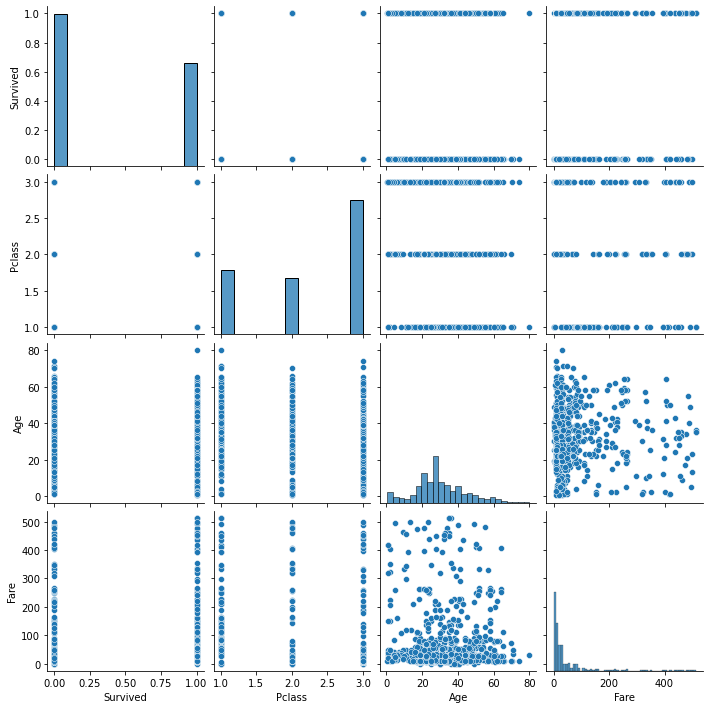

In [14]:
sns.pairplot(data[['Survived', 'Pclass', 'Age', 'Fare', 'Sex']])

### EDA - Correlation
Let's understand the correlation between the different variables.

In [15]:
data.corr()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
PassengerId,1.000000,0.060211,-0.091191,0.081574,0.187344,0.277960,0.389904
Survived,0.060211,1.000000,-0.305096,-0.052368,0.025996,0.109678,0.192999
Pclass,-0.091191,-0.305096,1.000000,-0.360709,0.003464,-0.041493,-0.320058
Age,0.081574,-0.052368,-0.360709,1.000000,-0.167255,-0.078370,0.082497
SibSp,0.187344,0.025996,0.003464,-0.167255,1.000000,0.439342,0.397940
Parch,0.277960,0.109678,-0.041493,-0.078370,0.439342,1.000000,0.431476
Fare,0.389904,0.192999,-0.320058,0.082497,0.397940,0.431476,1.000000


<AxesSubplot:>

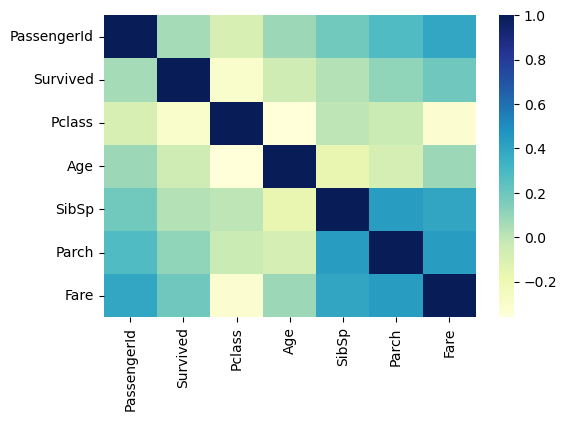

In [16]:
plt.figure(figsize=(6,4),dpi=100)
sns.heatmap(data.corr(), cmap="YlGnBu")

### EDA - Survival Rate by Different Variables
Survival rates can be calculated for many variables (e.g., age, fare). For this EDA, I just wanted to focus on a few variables: gender, Pclass, and cabin.

#### Survival by Gender

In [17]:
#Total number of men and women and whether they survived
data.groupby(['Sex', 'Survived']).size()

Sex     Survived
female  0           104
        1           264
male    0           492
        1           140
dtype: int64

In [18]:
#Calculating the survival rates for each gender
unique_sex = data['Sex'].unique()

for sex in unique_sex:
    #Total number of passengers for each gender
    count_gen = data[data['Sex'] == sex].shape[0]

    #Total number of passengers who survived for each gender
    count_gen_surv = data[(data['Sex'] == sex) & (data['Survived'] == 1)].shape[0]

    #Survival rate of passengers for each gender
    surv_rate_gen = count_gen_surv / count_gen * 100
    rounded = round(surv_rate_gen,2)
    print(str(sex) + ": " + str(rounded)+"%")

male: 22.15%
female: 71.74%


#### Survival by Pclass

In [19]:
#Total number of passengers for each Pclass and whether they survived
data.groupby(['Pclass', 'Survived']).size()

Pclass  Survived
1       0            98
        1           155
2       0           111
        1           109
3       0           387
        1           140
dtype: int64

In [20]:
#Calculating the survival rates for each Pclass

#Grabbing the unique Pclass values
unique_pclass = data['Pclass'].unique()
#Sorting the unique Pclass values
unique_pclass.sort()

for num in unique_pclass:
    #Total number of passengers for each Pclass
    count_pclass = data[data['Pclass'] == num].shape[0]

    #Total number of passengers who survived for each Pclass
    count_pclass_surv = data[(data['Pclass'] == num) & (data['Survived'] == 1)].shape[0]

    #Survival rate of passengers for each Pclass
    surv_rate_pclass = count_pclass_surv / count_pclass * 100
    rounded = round(surv_rate_pclass, 2)
    print("Pclass " + str(unique_pclass[num-1]) + ": " + str(rounded)+"%")

Pclass 1: 61.26%
Pclass 2: 49.55%
Pclass 3: 26.57%


#### Survival by Cabin

In [21]:
#Total number of passengers for each cabin and whether they survived
data.groupby(['Cabin', 'Survived']).size()

Cabin  Survived
A      0            13
       1            17
B      0            17
       1            41
C      0           515
       1           258
D      0            16
       1            32
E      0            14
       1            33
F      0            14
       1            17
G      0             6
       1             6
T      0             1
dtype: int64

In [22]:
#Calculating the survival rates for each cabin

#Grabbing the unique Cabin values
unique_cabin = data['Cabin'].unique()
#Sorting the unique Cabin values
unique_cabin.sort()

for letter in unique_cabin:
    #Total number of passengers for each cabin
    count_cab = data[data['Cabin'] == letter].shape[0]
    
    #Total number of passengers who survived for each Pclass
    count_cab_surv = data[(data['Cabin'] == letter) & (data['Survived'] == 1)].shape[0]

    #Survival rate of Pclass passengers for each Pclass
    surv_rate_cab = count_cab_surv / count_gen * 100
    rounded = round(surv_rate_cab,2)
    print("Cabin " + str(letter) + ": " + str(rounded)+"%")

Cabin A: 4.62%
Cabin B: 11.14%
Cabin C: 70.11%
Cabin D: 8.7%
Cabin E: 8.97%
Cabin F: 4.62%
Cabin G: 1.63%
Cabin T: 0.0%


# Data Processing and normalization

In [23]:
#Change the 'Sex' labels to the values 0, 1 instead of male and female
#Male = 1; Female = 0
le = LabelEncoder()
data['Sex'] = le.fit_transform(data['Sex'])

In [24]:
#Change the 'Cabin' labels to the values 0, 1, etc. instead of A, B, etc.
#A = 0; B = 1, C = 2, D = 3, E = 4, F = 5, G = 6, T = 7
le = LabelEncoder()
data['Cabin'] = le.fit_transform(data['Cabin'])

In [25]:
#Specifying X and y from the data
X = data[['Cabin', 'Pclass', 'Sex', 'Age', 'SibSp', 'Parch', 'Fare']]
y = data['Survived']

In [26]:
#Creating training and testing variables
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=20)

In [27]:
#Using standard scaler to standardize the data
scale = StandardScaler()

X_train_scaled = scale.fit_transform(X_train)
X_test_scaled = scale.transform(X_test)

# Creating ML model 1
Creating a Logistic Regression model to predict survival.

In [28]:
model = LogisticRegression(solver='liblinear', random_state=20)
model.fit(X_train_scaled, y_train)

LogisticRegression(random_state=20, solver='liblinear')

## Prediction on Test data

In [29]:
#Predicting values from the testing set
y_pred = model.predict(X_test_scaled)

## Model 1 Performance

In [30]:
# How well did the model do?
accuracy_score = round(model.score(X_test_scaled, y_test) * 100, 2)
print("Model accuracy:", accuracy_score, "%")

Model accuracy: 77.0 %


Let's try building another model to see if we can achieve greater accuracy.

# Creating ML model 2
Creating a decision tree model to predict survival.

In [31]:
# Create a decision tree regressor with a maximum depth of 3
DTR = DecisionTreeRegressor(max_depth=3)
DTR.fit(X_train_scaled, y_train)

DecisionTreeRegressor(max_depth=3)

## Prediction on Test data

In [32]:
#Predicting values from the testing set
y_pred = DTR.predict(X_test_scaled)

## Model 2 Performance

In [33]:
# How well did the model do?
accuracy_score = round(DTR.score(X_test_scaled, y_test) * 100, 2)
print("Model accuracy:", accuracy_score, "%")

Model accuracy: 35.93 %


# Report and insight from your analysis

I made a few different models (i.e., linear regression, logistic regression, decision tree) for this project and learned that linear regression works better for continuous variables, whereas logistic regression and decision tree work better for categorical or boolean variables. Because I wanted to create models to predict survival (a boolean variable), I created two models to support this: logistic regression and decision tree. The results of the model show that for the Titanic dataset, the logistic regression model is more accurate than the decision tree model for predicting survivability. 